AIRLINE ANALYSIS - Data Visualization 

In this project, we'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

Univariate Analysis, Bivariate Analysis, and Multivariate Analysis

Univariate Analysis
1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

#Reading Dataset
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
stat = flight.coach_price.describe()
print(stat)

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
count    129780.000000
mean        376.585253
std          67.

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


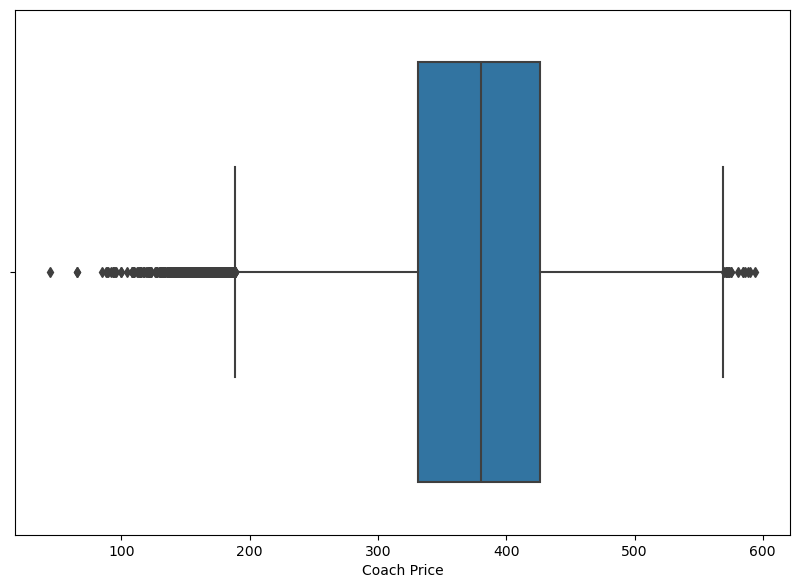

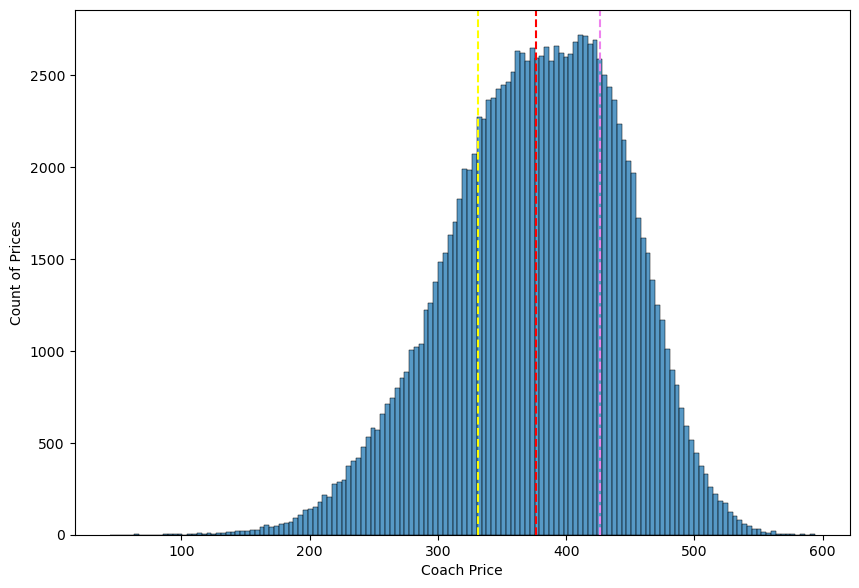

<Figure size 640x480 with 0 Axes>

In [2]:
plt.figure (figsize=(10,15))
plt.subplot(2,1,1)
sns.boxplot(x=flight.coach_price)
plt.xlabel('Coach Price')
plt.savefig('boxplot.jpeg')

plt.figure (figsize=(10,15))
plt.subplot(2,1,2)
sns.histplot(x=flight.coach_price)
plt.axvline (stat['mean'], color='red', linestyle='dashed')
plt.axvline (stat['25%'], color='yellow', linestyle='dashed')
plt.axvline (stat['75%'], color='violet', linestyle='dashed')
plt.xlabel('Coach Price')
plt.ylabel('Count of Prices')
plt.savefig('histplot.jpeg')
plt.show()
plt.clf()

2. Visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


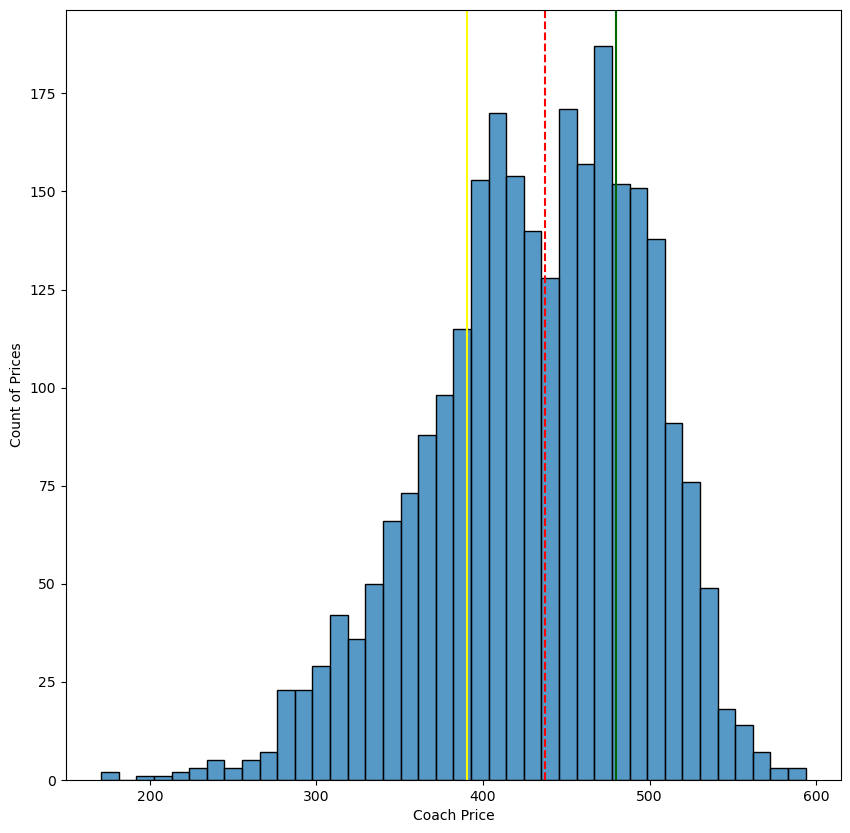

<Figure size 640x480 with 0 Axes>

In [3]:
## Task 2
plt.figure (figsize=(10,10))
sns.histplot(x=flight.coach_price[flight.hours >= 8], bins=40)
plt.axvline (flight.coach_price[flight.hours >= 8].median(), color='red', linestyle='dashed')
plt.axvline (flight.coach_price[flight.hours >= 8].quantile(q=0.25), color='yellow')
plt.axvline (flight.coach_price[flight.hours >= 8].quantile(q=0.75), color='darkgreen')
plt.xlabel('Coach Price')
plt.ylabel('Count of Prices')
plt.savefig('couch_price_8h.jpeg')
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


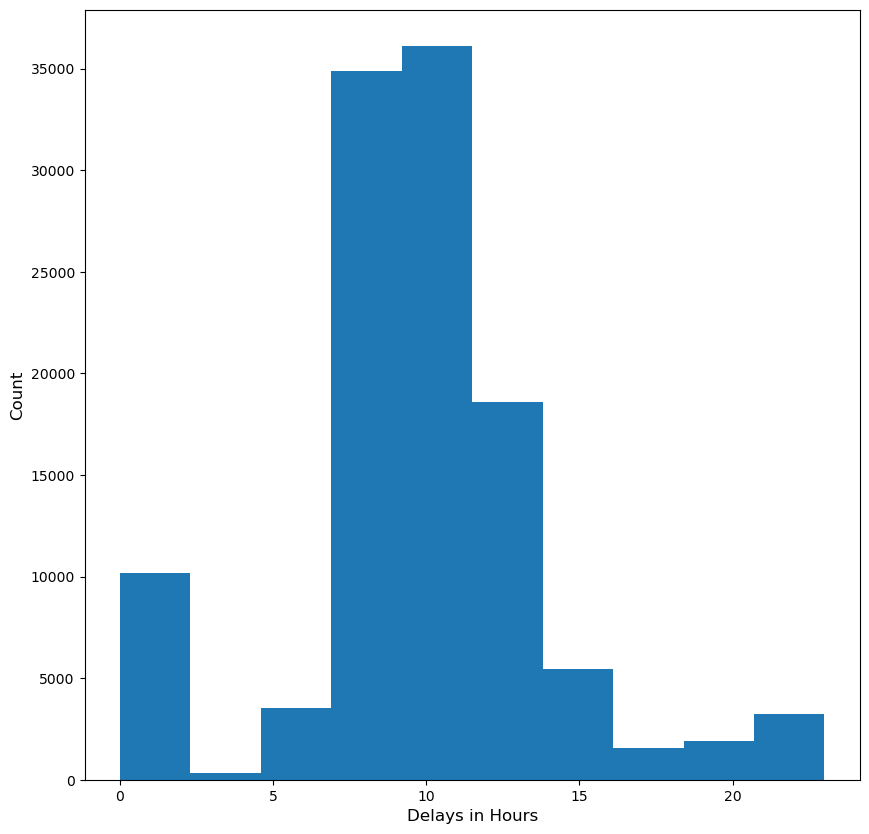

<Figure size 640x480 with 0 Axes>

In [4]:
## Task 3
print(flight.delay.describe())
plt.figure (figsize=(10,10))
plt.hist(x=flight.delay[flight.delay<24])
plt.xlabel('Delays in Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('delay_plot.jpeg')
plt.show()
plt.clf()

Bivariate Analysis
4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

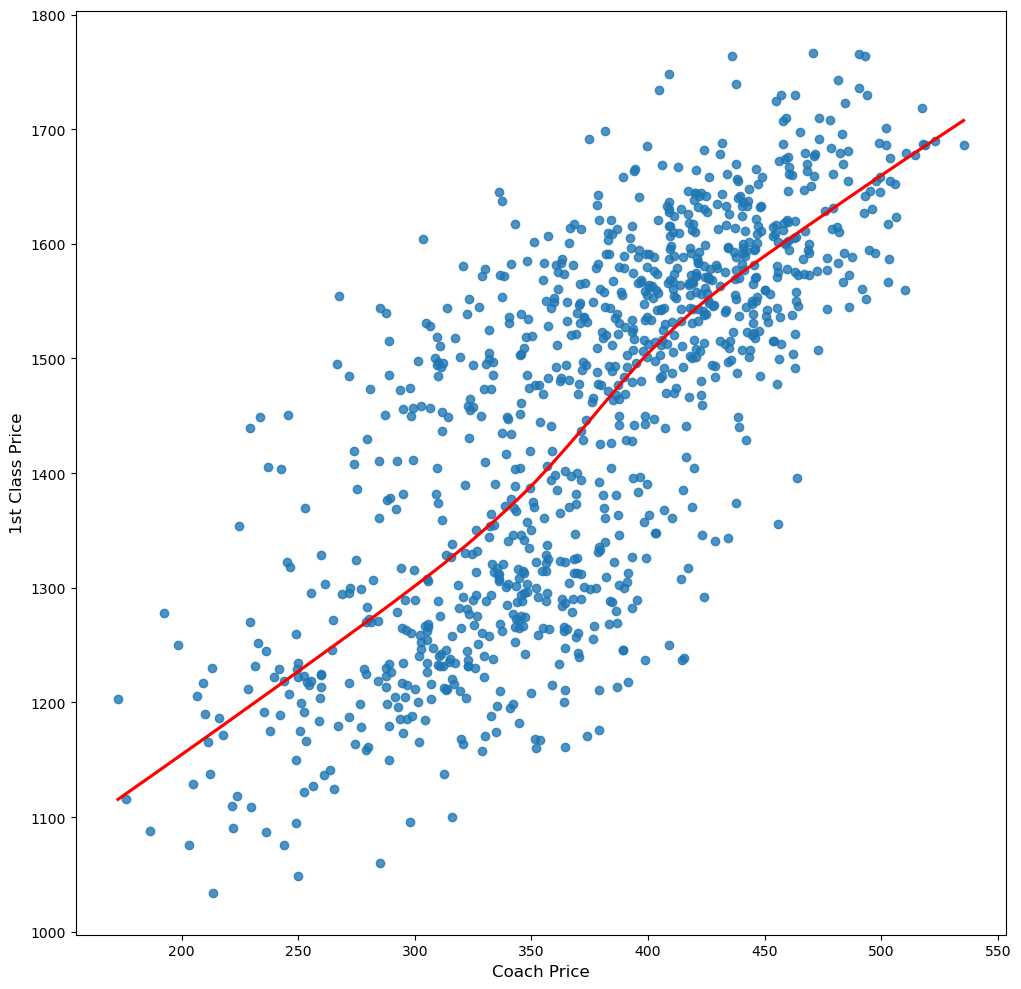

<Figure size 640x480 with 0 Axes>

In [5]:
## Task 4
flight_1000 = flight.sample(1000)
plt.figure (figsize=(12,12))
sns.regplot(x='coach_price', y='firstclass_price', data=flight_1000, line_kws={'color': 'red'}, lowess=True)
plt.xlabel('Coach Price', fontsize=12)
plt.ylabel('1st Class Price', fontsize=12)
plt.savefig('Coach_vs_1class.jpeg')
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features — inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

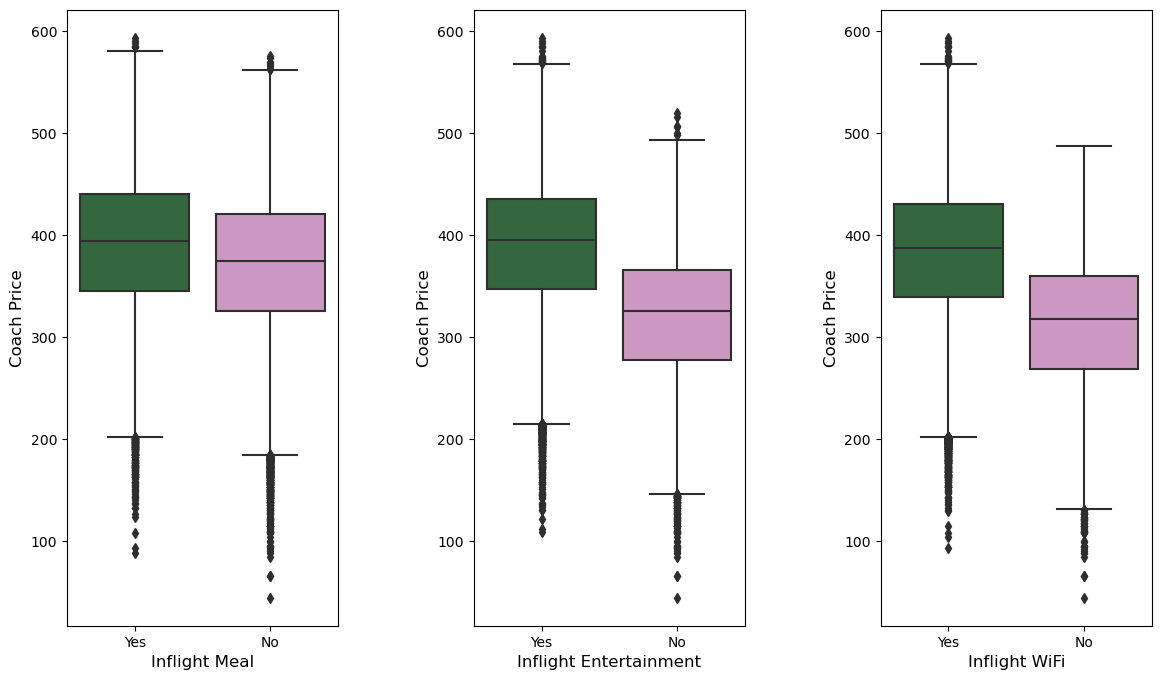

In [6]:
## Task 5
plt.figure (figsize=(14,8))
plt.subplot(1,3,1)
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, order=["Yes", "No"], palette='cubehelix')
plt.xlabel('Inflight Meal', fontsize=12)
plt.ylabel('Coach Price', fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, order=["Yes", "No"], palette='cubehelix')
plt.xlabel('Inflight Entertainment', fontsize=12)
plt.ylabel('Coach Price', fontsize=12)
plt.subplot(1,3,3)
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, order=["Yes", "No"], palette='cubehelix')
plt.xlabel('Inflight WiFi', fontsize=12)
plt.ylabel('Coach Price', fontsize=12)
plt.subplots_adjust(wspace=0.5)
plt.savefig('Features_vs_coach-price.jpeg')
plt.show()

6. How does the number of passengers change in relation to the length of flights?

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


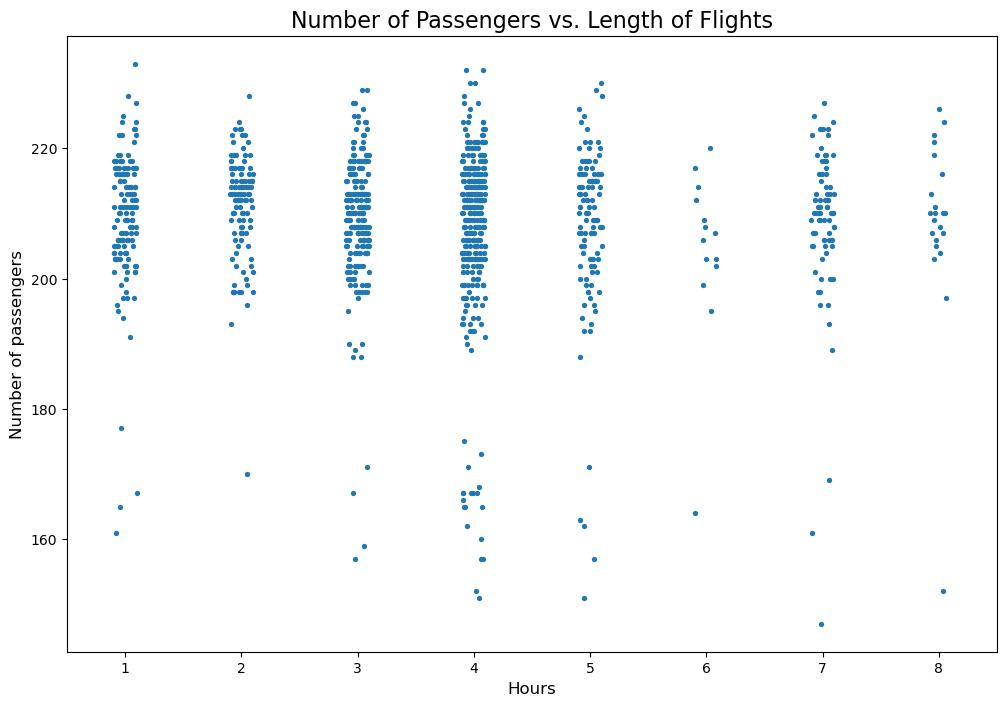

In [7]:
## Task 6
flight_1000 = flight.sample(1000)
plt.figure (figsize=(12,8))
sns.stripplot(x='hours', y='passengers',  dodge=True, size=3.8, data=flight_1000)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Number of passengers', fontsize=12)
plt.title('Number of Passengers vs. Length of Flights', fontsize=16)
plt.savefig('Hours_vs_passengers.jpeg')
plt.show()

Multivariate Analysis
7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

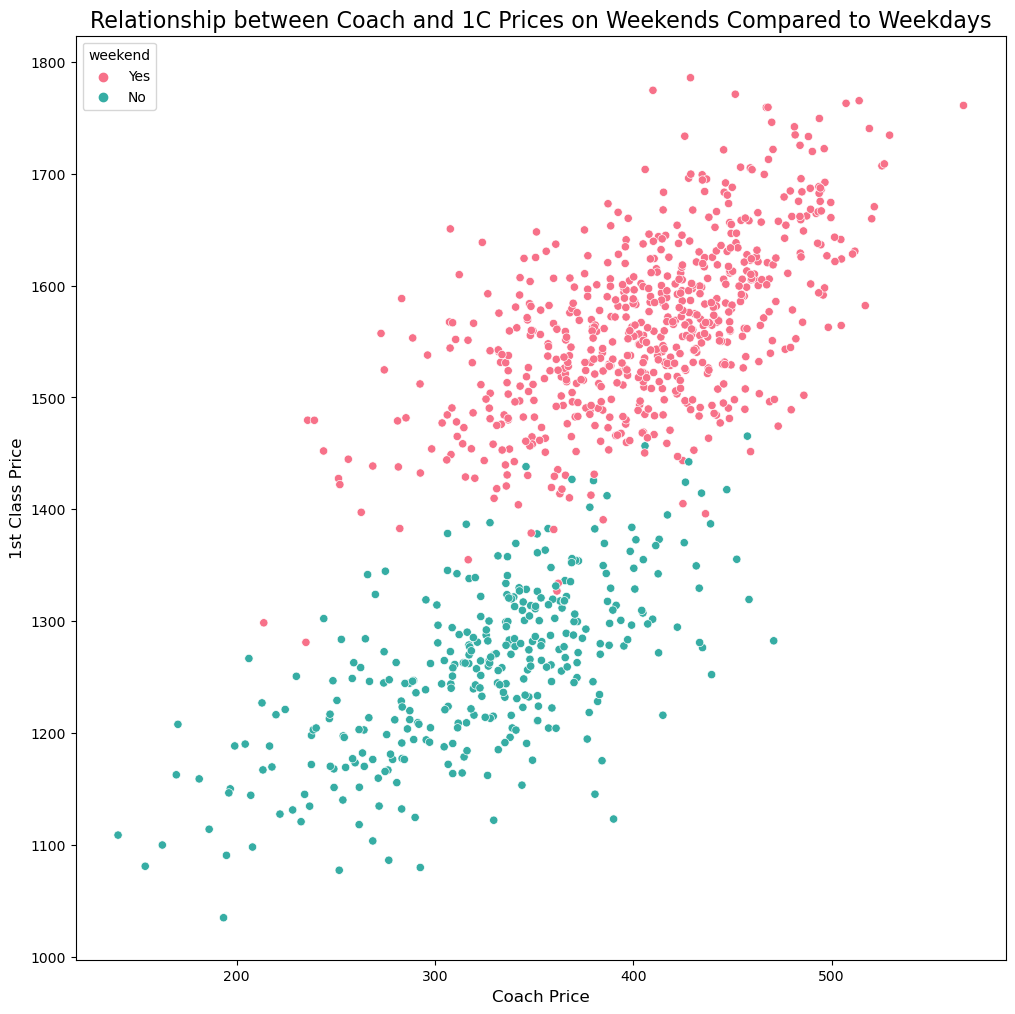

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 7
flight_1000 = flight.sample(1000)
plt.figure (figsize=(12,12))
sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight_1000, palette='husl')
plt.xlabel('Coach Price', fontsize=12)
plt.ylabel('1st Class Price', fontsize=12)
plt.title('Relationship between Coach and 1C Prices on Weekends Compared to Weekdays', fontsize=16)
plt.savefig('Coach_and_1class_vs_weekend.jpeg')
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

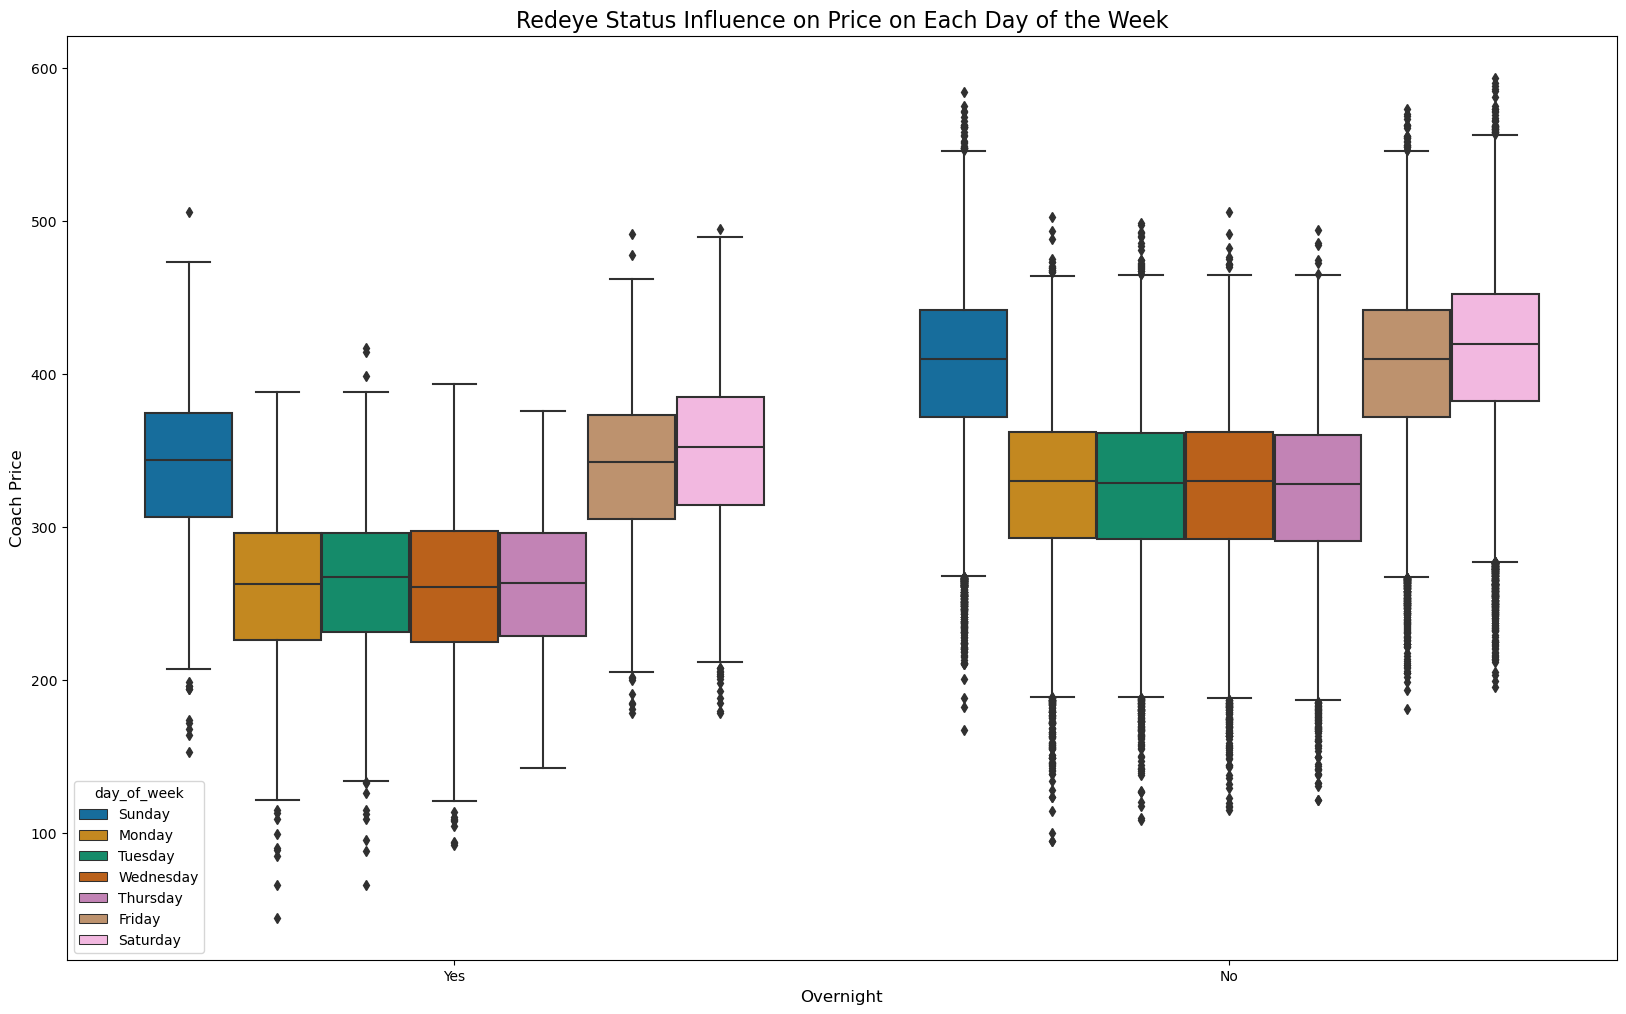

<Figure size 640x480 with 0 Axes>

In [9]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure (figsize=(20,12))
sns.boxplot(x='redeye', y='coach_price', hue='day_of_week', hue_order=days, palette='colorblind', data=flight)
plt.xlabel('Overnight', fontsize=12)
plt.ylabel('Coach Price', fontsize=12)
plt.title('Redeye Status Influence on Price on Each Day of the Week', fontsize=16)
plt.savefig('Redeye_and_day_vs_couch_price.jpeg')
plt.show()
plt.clf()